In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
my_df = pd.read_csv('drive/MyDrive/datasets/pre_data_dl_aug2.csv')
#my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,Unnamed: 0,Combined Description Cleaned,Assignment group,LabelEncodings
0,0,login issue user manager name checked the name...,GRP_0,0
1,1,outlook received from hello team my are not in...,GRP_0,0
2,2,cannot log in to received from hi i cannot on ...,GRP_0,0
3,3,unable to access tool page,GRP_0,0
4,4,error,GRP_0,0


In [4]:
df2 = my_df
my_df['Assignment group by number'] = my_df['Assignment group'].str[4:]
my_df['Assignment group by number'] = my_df['Assignment group by number'].astype(int)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31221 entries, 0 to 31220
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    31221 non-null  int64 
 1   Combined Description Cleaned  31221 non-null  object
 2   Assignment group              31221 non-null  object
 3   LabelEncodings                31221 non-null  int64 
 4   Assignment group by number    31221 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [5]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31221 entries, 0 to 31220
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    31221 non-null  int64 
 1   Combined Description Cleaned  31221 non-null  object
 2   Assignment group              31221 non-null  object
 3   LabelEncodings                31221 non-null  int64 
 4   Assignment group by number    31221 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB


In [6]:
x = my_df['Combined Description Cleaned']
y = my_df['Assignment group by number']

In [7]:
#y = tf.keras.utils.to_categorical(y)

In [8]:
from sklearn.model_selection import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02,
                                                                                  random_state=SEED, shuffle=True)
                                                                                 # stratify=y)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [9]:
y_train.shape

(30596,)

In [10]:
y_validation.shape

(312,)

In [11]:
from sklearn.linear_model import LogisticRegression

## Doc2Vec

Before we jump into doc2vec, it will be better to first start by word2vec. "Word2vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words."

DM: 
This is the Doc2Vec model analogous to CBOW model in Word2vec. The paragraph vectors are obtained by training a neural network on the task of inferring a centre word based on context words and a context paragraph. 

DBOW:
This is the Doc2Vec model analogous to Skip-gram model in Word2Vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

Below are the methods I used to get the vectors for each ticket.

1. DBOW (Distributed Bag of Words)
2. DMC (Distributed Memory Concatenated)
3. DMM (Distributed Memory Mean)
4. DBOW + DMC
5. DBOW + DMM

With above vectors, I fit a simple logistic regression model and evaluated the result on the validation set.

In [12]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

In [13]:
def labelize_tickets_ug(tickets,label):
    result = []
    prefix = label
    for i, t in zip(tickets.index, tickets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result

Also, the same rationale has been applied in the Gensim's Doc2Vec tutorial. In the IMDB tutorial, vector training is occurring on all documents of the data set, including all train/test/dev set. https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-IMDB.ipynb

In [14]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v = labelize_tickets_ug(all_x, 'all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


In [15]:
len(all_x_w2v)

31221

In [16]:
all_x_w2v

[LabeledSentence(words=['my', 'screen', 'would', 'momentarily', 'and', 'return', 'with', 'the', 'following', 'display', 'driver', 'stopped', 'i', 'have', 'just', 'recently', 'after', 'change', 'every', 'time', 'used', 'need', 'dealing', 'huge', 'information', 'out', 'message', 'this', 'could', 'happen', 'as', 'often', 'when', 'am', 'excel', 'twice', 'it', 'was', 'so', 'bad', 'that', 'turn', 'blue', 'some', 'information', 'on', 'crash', 'dump', 'to', 'force', 'restart'], tags=['all_15866']),
 LabeledSentence(words=['need', 'access', 'to', 'rule', 'system', 'other', 'enter', 'user', 'id', 'of', 'the', 'issue', 'transaction', 'needs', 'or', 'was', 'working', 'with', 'describe', 't', 'code', 'if', 'you', 'are', 'already', 'a', 'not', 'authorized', 'message', 'recreate', 'condition', 'then', 'do', 'and', 'attach', 'result', 'ticketing', 'tool', 'ticket', 'attached', 'provide', 'same', 'as', 'this'], tags=['all_14653']),
 LabeledSentence(words=['new', 'received', 'from', 'hi', 'trying', 'to'

## DBOW

In [17]:
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=16, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 3248179.71it/s]


According to the developer Radim Řehůřek who created Gensim,
"One caveat of the way this algorithm runs is that, since the learning rate decrease over the course of iterating over the data, labels which are only seen in a single LabeledSentence during training will only be trained with a fixed learning rate. This frequently produces less than optimal results."

Below iteration implement explicit multiple-pass, alpha-reduction approach with added shuffling. This has been already presented in Gensim's IMDB tutorial.

In [18]:
%%time
for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3572120.49it/s]


CPU times: user 1min 13s, sys: 12.9 s, total: 1min 26s
Wall time: 56.7 s


In [19]:
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs

In [20]:
train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_validation, 100)

In [21]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')

clf.fit(train_vecs_dbow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
clf.score(validation_vecs_dbow, y_validation)

0.5641025641025641

Even though the DBOW model doesn't learn the meaning of the individual words, but as features to feed to a classifier, it seems like it's doing its job.

But the result doesn't seem to excel count vectorizer or Tfidf vectorizer. It might not be a direct comparison since either count vectorizer of Tfidf vectorizer uses a large number of features to represent a tweet, but in this case, a vector for each tweet has only 200 dimensions.

In [23]:
model_ug_dbow.save('drive/MyDrive/grams/d2v_model_ug_dbow.doc2vec')
model_ug_dbow = Doc2Vec.load('drive/MyDrive/grams/d2v_model_ug_dbow.doc2vec')

In [24]:
model_ug_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

## Distributed Memory (concatenated)

In [25]:
cores = multiprocessing.cpu_count()
model_ug_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmc.build_vocab([x for x in tqdm(all_x_w2v)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 2618012.46it/s]


In [26]:
%%time
for epoch in range(30):
    model_ug_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmc.alpha -= 0.002
    model_ug_dmc.min_alpha = model_ug_dmc.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3618412.96it/s]


CPU times: user 1min 27s, sys: 16.5 s, total: 1min 43s
Wall time: 1min 1s


In [27]:
#model_ug_dmc = Doc2Vec.load('d2v_model_ug_dmc.doc2vec')


What's nice about Doc2Vec is that after training you can retrieve not only document vectors but also individual word vectors as well. Note, however, that a Doc2Vec DBOW model doesn't learn semantic word vectors, so the word vectors you retrieve from pure DBOW model will be the automatic randomly-initialized vectors, with no meaning.
But with DM model, you can see the semantic relationship between words. Let's see what word vectors it has learned through training.

In [28]:
model_ug_dmc.most_similar('good')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('great', 0.49739018082618713),
 ('labor', 0.46986299753189087),
 ('sat', 0.46453961730003357),
 ('sinkhole', 0.43653297424316406),
 ('nice', 0.4315698742866516),
 ('noncompliance', 0.42851385474205017),
 ('seit', 0.4280681014060974),
 ('delta', 0.4214487373828888),
 ('every', 0.41727468371391296),
 ('take', 0.41668832302093506)]

In [29]:
model_ug_dmc.most_similar('network')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('elm', 0.4514523446559906),
 ('rule', 0.4345603883266449),
 ('knowledge', 0.4295300841331482),
 ('circusomething', 0.4253024160861969),
 ('aborted', 0.40351083874702454),
 ('concrete', 0.40240514278411865),
 ('toss', 0.39537402987480164),
 ('recreate', 0.387096643447876),
 ('minus', 0.38439515233039856),
 ('adaptor', 0.3840002417564392)]

What's interesting with DMC model is, somehow it learned all the misspelled version of a word as you can see from the above.

In [30]:
model_ug_dmc.most_similar('password')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('import', 0.44512808322906494),
 ('channel', 0.4325460195541382),
 ('payment', 0.42900627851486206),
 ('portfolio', 0.4282849431037903),
 ('backdoor', 0.41886597871780396),
 ('rad', 0.40810057520866394),
 ('authentication', 0.40247347950935364),
 ('electromechanical', 0.402332067489624),
 ('\\', 0.40209728479385376),
 ('counsel', 0.398153156042099)]

In [31]:
model_ug_dmc.most_similar(positive=['bigger', 'small'], negative=['big'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('registered', 0.3896659314632416),
 ('born', 0.3570252060890198),
 ('indicator', 0.34719228744506836),
 ('saved', 0.34702688455581665),
 ('minute', 0.34257346391677856),
 ('proposal', 0.33975642919540405),
 ('inside', 0.3336832523345947),
 ('especially', 0.32864856719970703),
 ('tha', 0.31340551376342773),
 ('employee', 0.3008264899253845)]

The model successfully catches the comparative form of "small", on feeding the word "big" and "bigger". The above line of code is like asking the model to add the vectors associated with the word "bigger" and "small" while subtracting "big" is equal to the top result, "smaller".

In [32]:
train_vecs_dmc = get_vectors(model_ug_dmc, x_train, 100)
validation_vecs_dmc = get_vectors(model_ug_dmc, x_validation, 100)

In [33]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dmc, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
clf.score(validation_vecs_dmc, y_validation)

0.22115384615384615

In [35]:
model_ug_dmc.save('drive/MyDrive/grams/d2v_model_ug_dmc.doc2vec')
model_ug_dmc = Doc2Vec.load('drive/MyDrive/grams/d2v_model_ug_dmc.doc2vec')
model_ug_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

## Distributed Memory (mean)

In [36]:
cores = multiprocessing.cpu_count()
model_ug_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dmm.build_vocab([x for x in tqdm(all_x_w2v)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 2688091.25it/s]


In [37]:
%%time
for epoch in range(30):
    model_ug_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dmm.alpha -= 0.002
    model_ug_dmm.min_alpha = model_ug_dmm.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3410876.36it/s]


CPU times: user 2min 26s, sys: 48.5 s, total: 3min 14s
Wall time: 2min 2s


In [38]:
model_ug_dmm.most_similar('schedule')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('resume', 0.6807745695114136),
 ('regular', 0.47727298736572266),
 ('job', 0.45037853717803955),
 ('next', 0.41028138995170593),
 ('arc', 0.39778828620910645),
 ('ceremony', 0.3630720376968384),
 ('insecurity', 0.354709655046463),
 ('cluster', 0.34837090969085693),
 ('addregardingss', 0.34738415479660034),
 ('notch', 0.3469822406768799)]

In [39]:
model_ug_dmc.most_similar('network')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('elm', 0.4514523446559906),
 ('rule', 0.4345603883266449),
 ('knowledge', 0.4295300841331482),
 ('circusomething', 0.4253024160861969),
 ('aborted', 0.40351083874702454),
 ('concrete', 0.40240514278411865),
 ('toss', 0.39537402987480164),
 ('recreate', 0.387096643447876),
 ('minus', 0.38439515233039856),
 ('adaptor', 0.3840002417564392)]

In [40]:
train_vecs_dmm = get_vectors(model_ug_dmm, x_train, 100)
validation_vecs_dmm = get_vectors(model_ug_dmm, x_validation, 100)

In [41]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dmm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
clf.score(validation_vecs_dmm, y_validation)

0.42628205128205127

In [43]:
model_ug_dmm.save('drive/MyDrive/grams/d2v_model_ug_dmm.doc2vec')
model_ug_dmm = Doc2Vec.load('drive/MyDrive/grams/d2v_model_ug_dmm.doc2vec')
model_ug_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

Since I have the document vectors from four different models, now I can concatenate them in combination to see how it affects the performance. Below I defined a simple function to concatenate document vectors from different models.

In [44]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

In [45]:
train_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_train, 200)
validation_vecs_dbow_dmc = get_concat_vectors(model_ug_dbow,model_ug_dmc, x_validation, 200)

In [46]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_dmc, y_train)

CPU times: user 2min 39s, sys: 4min 23s, total: 7min 3s
Wall time: 1min 46s


In [47]:
clf.score(validation_vecs_dbow_dmc, y_validation)

0.5641025641025641

In [48]:
train_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_train, 200)
validation_vecs_dbow_dmm = get_concat_vectors(model_ug_dbow,model_ug_dmm, x_validation, 200)

In [49]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_dmm, y_train)

CPU times: user 4min 39s, sys: 7min 44s, total: 12min 23s
Wall time: 3min 7s


In [50]:
clf.score(validation_vecs_dbow_dmm, y_validation)

0.6121794871794872

In case of unigram, concatenating document vectors in different combination boosted the model performance. The best validation accuracy I got from a single model is from DBOW at 73.89%. With concatenated vectors, I get the highest validation accuracy of 75.51% with DBOW+DMM model.

In [51]:
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser

In [52]:
tokenized_train = [t.split() for t in x_train]

In [53]:
%%time
phrases = Phrases(tokenized_train)
bigram = Phraser(phrases)

CPU times: user 1.55 s, sys: 0 ns, total: 1.55 s
Wall time: 1.55 s


In [54]:
sent = [u'the', u'mayor', u'of', u'new', u'york', u'was', u'there']
print(bigram[sent])

['the', 'mayor', 'of', 'new', 'york', 'was', 'there']


In [55]:
x_train

15866    my screen would momentarily and return with th...
14653    need access to rule system other enter user id...
11271    new received from hi trying to instanotherll a...
2206                 external user for help calendar issue
9457     intercompany tool issue from sent subject re h...
                               ...                        
1590     account is received from so the could you exte...
4045     mobile device activation personally s in to ge...
29902    access to for no longer he needs access please...
4936     round off on total we so of order should be bu...
27574         enable activity listing account summary need
Name: Combined Description Cleaned, Length: 30596, dtype: object

In [56]:
x_train[10]

'engineering tool not connected and unable to submit'

In [57]:
bigram[x_train[10].split()]

['engineering_tool', 'not', 'connected', 'and', 'unable', 'to', 'submit']

In [58]:
def labelize_tickets_bg(tickets,label):
    result = []
    prefix = label
    for i, t in zip(tickets.index, tickets):
        result.append(LabeledSentence(bigram[t.split()], [prefix + '_%s' % i]))
    return result

In [59]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v_bg = labelize_tickets_bg(all_x, 'all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


## DBOW Bigram

In [60]:
cores = multiprocessing.cpu_count()
model_bg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dbow.build_vocab([x for x in tqdm(all_x_w2v_bg)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 2325319.46it/s]


In [61]:
%%time
for epoch in range(30):
    model_bg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dbow.alpha -= 0.002
    model_bg_dbow.min_alpha = model_bg_dbow.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3291202.50it/s]


CPU times: user 1min 9s, sys: 17.5 s, total: 1min 27s
Wall time: 58 s


In [62]:
train_vecs_dbow_bg = get_vectors(model_bg_dbow, x_train, 100)
validation_vecs_dbow_bg = get_vectors(model_bg_dbow, x_validation, 100)

In [63]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_bg, y_train)

CPU times: user 2min 4s, sys: 2min 55s, total: 4min 59s
Wall time: 1min 15s


In [64]:
clf.score(validation_vecs_dbow_bg, y_validation)

0.5641025641025641

In [65]:
model_bg_dbow.save('drive/MyDrive/grams/d2v_model_bg_dbow.doc2vec')
model_bg_dbow = Doc2Vec.load('drive/MyDrive/grams/d2v_model_bg_dbow.doc2vec')
model_bg_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

### DMC Bigram

In [66]:
cores = multiprocessing.cpu_count()
model_bg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmc.build_vocab([x for x in tqdm(all_x_w2v_bg)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 3271060.50it/s]


In [67]:
%%time
for epoch in range(30):
    model_bg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmc.alpha -= 0.002
    model_bg_dmc.min_alpha = model_bg_dmc.alpha

100%|██████████| 31221/31221 [00:00<00:00, 2567805.27it/s]


CPU times: user 1min 26s, sys: 18.3 s, total: 1min 44s
Wall time: 1min 2s


In [68]:
model_bg_dmc.most_similar('schedule')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('resume', 0.6498955488204956),
 ('manager_pointing', 0.526020884513855),
 ('rerun', 0.48570677638053894),
 ('powder_mill', 0.48496562242507935),
 ('center_bucket', 0.48085349798202515),
 ('job_resume', 0.4804389476776123),
 ('hand_arc', 0.47001680731773376),
 ('respective', 0.4685259461402893),
 ('mac_address', 0.4587940573692322),
 ('arc', 0.4557734429836273)]

In [69]:
train_vecs_dmc_bg = get_vectors(model_bg_dmc, x_train, 100)
validation_vecs_dmc_bg = get_vectors(model_bg_dmc, x_validation, 100)

In [70]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dmc_bg, y_train)

CPU times: user 52.8 s, sys: 1min 11s, total: 2min 4s
Wall time: 31.3 s


In [71]:
clf.score(validation_vecs_dmc_bg, y_validation)

0.26282051282051283

In [72]:
model_bg_dmc.save('drive/MyDrive/grams/d2v_model_bg_dmc.doc2vec')
model_bg_dmc = Doc2Vec.load('drive/MyDrive/grams/d2v_model_bg_dmc.doc2vec')
model_bg_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

## DMM Bigram

In [73]:
cores = multiprocessing.cpu_count()
model_bg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_bg_dmm.build_vocab([x for x in tqdm(all_x_w2v_bg)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 2728587.37it/s]


In [74]:
%%time
for epoch in range(30):
    model_bg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_bg)]), total_examples=len(all_x_w2v_bg), epochs=1)
    model_bg_dmm.alpha -= 0.002
    model_bg_dmm.min_alpha = model_bg_dmm.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3414968.06it/s]


CPU times: user 2min 24s, sys: 58.2 s, total: 3min 22s
Wall time: 2min 8s


In [75]:
train_vecs_dmm_bg = get_vectors(model_bg_dmm, x_train, 100)
validation_vecs_dmm_bg = get_vectors(model_bg_dmm, x_validation, 100)

In [76]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dmm_bg, y_train)

CPU times: user 2min 51s, sys: 3min 57s, total: 6min 48s
Wall time: 1min 42s


In [77]:
clf.score(validation_vecs_dmm_bg, y_validation)

0.41346153846153844

In [78]:
model_bg_dmm.save('drive/MyDrive/grams/d2v_model_bg_dmm.doc2vec')
model_bg_dmm = Doc2Vec.load('drive/MyDrive/grams/d2v_model_bg_dmm.doc2vec')
model_bg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [79]:
train_vecs_dbow_dmc_bg = get_concat_vectors(model_bg_dbow,model_bg_dmc, x_train, 200)
validation_vecs_dbow_dmc_bg = get_concat_vectors(model_bg_dbow,model_bg_dmc, x_validation, 200)

In [80]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_dmc_bg, y_train)

CPU times: user 2min 44s, sys: 4min 33s, total: 7min 18s
Wall time: 1min 50s


In [81]:
clf.score(validation_vecs_dbow_dmc_bg, y_validation)

0.5705128205128205

In [82]:
train_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, x_train, 200)
validation_vecs_dbow_dmm_bg = get_concat_vectors(model_bg_dbow,model_bg_dmm, x_validation, 200)

In [83]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_dmm_bg, y_train)

CPU times: user 4min 18s, sys: 7min 4s, total: 11min 22s
Wall time: 2min 51s


In [84]:
clf.score(validation_vecs_dbow_dmm_bg, y_validation)

0.6185897435897436

## Trigram

In [85]:
%%time
tg_phrases = Phrases(bigram[tokenized_train])
trigram = Phraser(tg_phrases)

CPU times: user 3.29 s, sys: 369 ms, total: 3.66 s
Wall time: 3.29 s


In [86]:
trigram[bigram[x_train[10].split()]]

['engineering_tool', 'not', 'connected', 'and', 'unable', 'to', 'submit']

## Below Doc2Vec implementation is again same as unigram or bigram.

In [87]:
def labelize_tickets_tg(tickets,label):
    result = []
    prefix = label
    for i, t in zip(tickets.index, tickets):
        result.append(LabeledSentence(trigram[bigram[t.split()]], [prefix + '_%s' % i]))
    return result

In [88]:
all_x = pd.concat([x_train,x_validation,x_test])
all_x_w2v_tg = labelize_tickets_tg(all_x, 'all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  """


## DBOW Trigram

In [89]:
model_tg_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dbow.build_vocab([x for x in tqdm(all_x_w2v_tg)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 3293768.77it/s]


In [90]:
%%time
for epoch in range(30):
    model_tg_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dbow.alpha -= 0.002
    model_tg_dbow.min_alpha = model_tg_dbow.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3352458.08it/s]


CPU times: user 1min 6s, sys: 16.7 s, total: 1min 22s
Wall time: 56 s


In [91]:
train_vecs_dbow_tg = get_vectors(model_tg_dbow, x_train, 100)
validation_vecs_dbow_tg = get_vectors(model_tg_dbow, x_validation, 100)

In [92]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_tg, y_train)

CPU times: user 1min 59s, sys: 2min 44s, total: 4min 43s
Wall time: 1min 11s


In [93]:
clf.score(validation_vecs_dbow_tg, y_validation)

0.5737179487179487

In [94]:
model_tg_dbow.save('drive/MyDrive/grams/d2v_model_tg_dbow.doc2vec')
model_tg_dbow = Doc2Vec.load('drive/MyDrive/grams/d2v_model_tg_dbow.doc2vec')
model_tg_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

## DMC Trig

In [95]:
cores = multiprocessing.cpu_count()
model_tg_dmc = Doc2Vec(dm=1, dm_concat=1, size=100, window=2, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dmc.build_vocab([x for x in tqdm(all_x_w2v_tg)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 2791047.47it/s]


In [96]:
%%time
for epoch in range(30):
    model_tg_dmc.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dmc.alpha -= 0.002
    model_tg_dmc.min_alpha = model_tg_dmc.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3649065.52it/s]


CPU times: user 1min 24s, sys: 18.3 s, total: 1min 42s
Wall time: 1min 1s


In [97]:
train_vecs_dmc_tg = get_vectors(model_tg_dmc, x_train, 100)
validation_vecs_dmc_tg = get_vectors(model_tg_dmc, x_validation, 100)

In [98]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dmc_tg, y_train)

CPU times: user 51.2 s, sys: 1min 11s, total: 2min 2s
Wall time: 30.9 s


In [99]:
clf.score(validation_vecs_dmc_tg, y_validation)

0.28846153846153844

In [100]:
model_tg_dmc.save('drive/MyDrive/grams/d2v_model_tg_dmc.doc2vec')
model_tg_dmc = Doc2Vec.load('drive/MyDrive/grams/d2v_model_tg_dmc.doc2vec')
model_tg_dmc.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

## DMM Trigram

In [101]:
cores = multiprocessing.cpu_count()
model_tg_dmm = Doc2Vec(dm=1, dm_mean=1, size=100, window=4, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_tg_dmm.build_vocab([x for x in tqdm(all_x_w2v_tg)])

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 31221/31221 [00:00<00:00, 2708383.97it/s]


In [102]:
%%time
for epoch in range(30):
    model_tg_dmm.train(utils.shuffle([x for x in tqdm(all_x_w2v_tg)]), total_examples=len(all_x_w2v_tg), epochs=1)
    model_tg_dmm.alpha -= 0.002
    model_tg_dmc.min_alpha = model_tg_dmc.alpha

100%|██████████| 31221/31221 [00:00<00:00, 3898840.78it/s]


CPU times: user 2min 7s, sys: 51.9 s, total: 2min 59s
Wall time: 1min 56s


In [103]:
train_vecs_dmm_tg = get_vectors(model_tg_dmm, x_train, 100)
validation_vecs_dmm_tg = get_vectors(model_tg_dmm, x_validation, 100)

In [104]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dmm_tg, y_train)

CPU times: user 3min 54s, sys: 5min 32s, total: 9min 26s
Wall time: 2min 22s


In [105]:
clf.score(validation_vecs_dmm_tg, y_validation)

0.38782051282051283

In [106]:
model_tg_dmm.save('drive/MyDrive/grams/d2v_model_tg_dmm.doc2vec')
model_tg_dmm = Doc2Vec.load('drive/MyDrive/grams/d2v_model_tg_dmm.doc2vec')
model_tg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [107]:
train_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, x_train, 200)
validation_vecs_dbow_dmc_tg = get_concat_vectors(model_tg_dbow,model_tg_dmc, x_validation, 200)

In [108]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_dmc_tg, y_train)

CPU times: user 2min 23s, sys: 3min 53s, total: 6min 16s
Wall time: 1min 34s


In [109]:
clf.score(validation_vecs_dbow_dmc_tg, y_validation)

0.5961538461538461

In [110]:
train_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, x_train, 200)
validation_vecs_dbow_dmm_tg = get_concat_vectors(model_tg_dbow,model_tg_dmm, x_validation, 200)

In [111]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_dbow_dmm_tg, y_train)

CPU times: user 5min 13s, sys: 8min 26s, total: 13min 40s
Wall time: 3min 26s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [112]:
clf.score(validation_vecs_dbow_dmm_tg, y_validation)

0.6121794871794872

 I would like to try one more thing, which is creating joint vectors across different n-grams. By looking at the above table, for DBOW model unigram performed the best, so I will use vectors from unigram DBOW model and join this together with trigram DMM vectors.

In [113]:
model_ug_dbow = Doc2Vec.load('drive/MyDrive/grams/d2v_model_ug_dbow.doc2vec')
model_tg_dmm = Doc2Vec.load('drive/MyDrive/grams/d2v_model_tg_dmm.doc2vec')
model_ug_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_tg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [114]:
train_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_tg_dmm, x_train, 200)
validation_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_tg_dmm, x_validation, 200)

In [115]:
%%time
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(train_vecs_ugdbow_tgdmm, y_train)

CPU times: user 5min 11s, sys: 8min 36s, total: 13min 47s
Wall time: 3min 28s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
clf.score(validation_vecs_ugdbow_tgdmm, y_validation)

0.5961538461538461

In [117]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
d2v_ugdbow_tgdmm_mm = mmscaler.fit_transform(train_vecs_ugdbow_tgdmm)
d2v_ugdbow_tgdmm_mm_val = mmscaler.fit_transform(validation_vecs_ugdbow_tgdmm)

In [118]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import time
names1 = ["Logistic Regression", "Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers1 = [
    LogisticRegression(max_iter=1000),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf1 = zip(names1,classifiers1)

In [119]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time.time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time.time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [120]:
def classifier_comparator_d2v(train_vectors,validation_vectors, classifier=zipped_clf1):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, train_vectors, y_train, validation_vectors, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [121]:
classifier_comparator_d2v(d2v_ugdbow_tgdmm_mm,d2v_ugdbow_tgdmm_mm_val)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


null accuracy: 88.14%
accuracy score: 55.45%
model is 32.69% less accurate than null accuracy
train and test time: 215.78s
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
null accuracy: 88.14%
accuracy score: 21.47%
model is 66.67% less accurate than null accuracy
train and test time: 0.07s
--------------------------------------------------------------------------------
Validation result for Bernoulli NB
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
null accuracy: 88.14%
accuracy score: 9.62%
model is 78.53% less accurate than null accuracy
train and test time: 0.10s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
      

[('Logistic Regression', 0.5544871794871795, 215.7783350944519),
 ('Multinomial NB', 0.21474358974358973, 0.07187557220458984),
 ('Bernoulli NB', 0.09615384615384616, 0.10235095024108887),
 ('Ridge Classifier', 0.4807692307692308, 0.2367722988128662),
 ('Perceptron', 0.42628205128205127, 14.884305953979492),
 ('Passive-Aggresive', 0.4807692307692308, 15.428239583969116),
 ('Nearest Centroid', 0.3717948717948718, 0.05173325538635254)]

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
lr = LogisticRegression(max_iter=1000)
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

### TFIDF Vectorizer

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [124]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 10000 features
null accuracy: 88.14%
accuracy score: 86.54%
model is 1.60% less accurate than null accuracy
train and test time: 85.85s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 88.14%
accuracy score: 87.50%
model is 0.64% less accurate than null accuracy
train and test time: 102.18s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 88.14%
accuracy score: 87.82%
model is 0.32% less accurate than null accuracy
train and test tim

In [125]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])

In [126]:
from gensim.models import Doc2Vec

In [127]:
def get_concat_vectors(model1,model2, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = np.append(model1.docvecs[prefix],model2.docvecs[prefix])
        n += 1
    return vecs

In [128]:

model_tg_dmm = Doc2Vec.load('drive/MyDrive/grams/d2v_model_tg_dmm.doc2vec')
model_ug_dbow = Doc2Vec.load('drive/MyDrive/grams/d2v_model_ug_dbow.doc2vec')
model_ug_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_tg_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [129]:
train_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_tg_dmm, x_train, 200)
validation_vecs_ugdbow_tgdmm = get_concat_vectors(model_ug_dbow,model_tg_dmm, x_validation, 200)

## Dimensionality Reduction

### Chi2 Feature Selection

In [130]:
tvec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
x_train_tfidf = tvec.fit_transform(x_train)
x_validation_tfidf = tvec.transform(x_validation)

In [131]:
from sklearn.feature_selection import chi2
chi2score = chi2(x_train_tfidf, y_train)[0]

Text(0.5, 0, '$\\chi^2$')

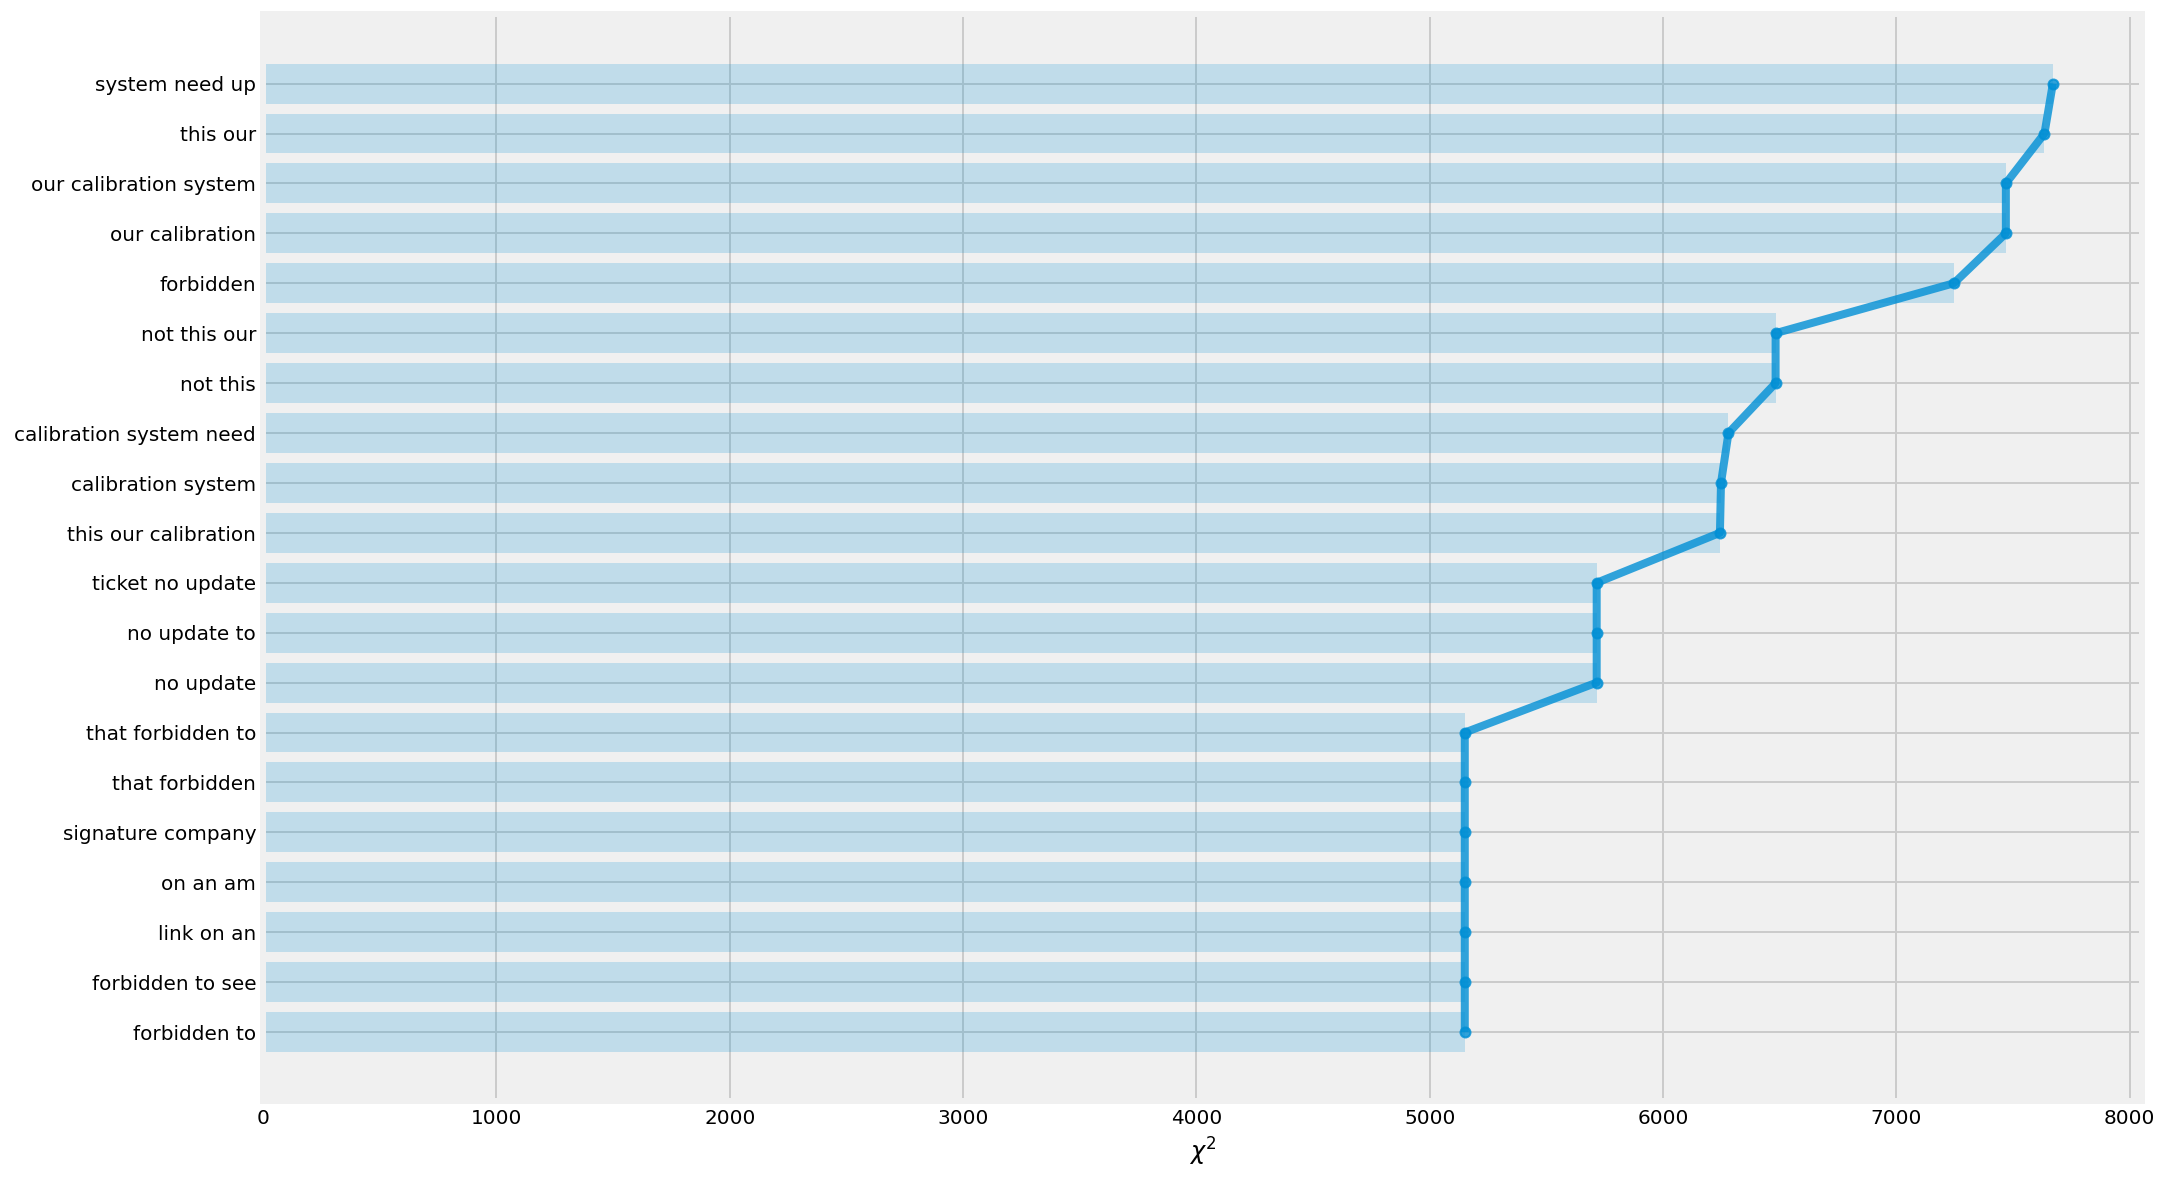

In [132]:
plt.figure(figsize=(15,10))
wscores = zip(tvec.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
#topchi2 = zip(wchi2)
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

In [133]:
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
for n in np.arange(10000,100000,10000):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(x_train_tfidf, y_train)
    x_validation_chi2_selected = ch2.transform(x_validation_tfidf)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(x_train_chi2_selected, y_train)
    score = clf.score(x_validation_chi2_selected, y_validation)
    ch2_result.append(score)
    print ("chi2 feature selection evaluation calculated for {} features".format(n))

chi2 feature selection evaluation calculated for 10000 features
chi2 feature selection evaluation calculated for 20000 features
chi2 feature selection evaluation calculated for 30000 features
chi2 feature selection evaluation calculated for 40000 features
chi2 feature selection evaluation calculated for 50000 features
chi2 feature selection evaluation calculated for 60000 features
chi2 feature selection evaluation calculated for 70000 features
chi2 feature selection evaluation calculated for 80000 features
chi2 feature selection evaluation calculated for 90000 features


### Principal Component Analysis (PCA)

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d2v_ugdbow_tgdmm_std = scaler.fit_transform(train_vecs_ugdbow_tgdmm)
d2v_ugdbow_tgdmm_std_val = scaler.fit_transform(validation_vecs_ugdbow_tgdmm)

In [135]:
from sklearn.decomposition import PCA

d2v_pca = PCA().fit(d2v_ugdbow_tgdmm_std)

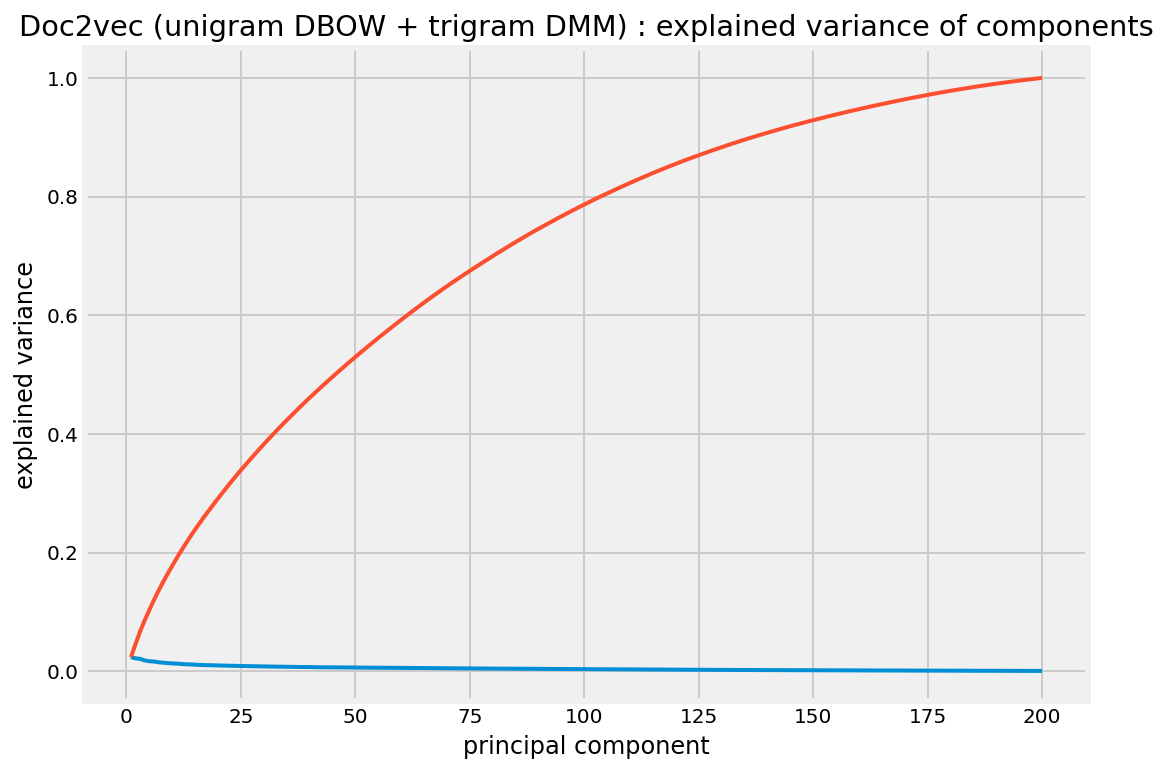

In [136]:
fig, ax = plt.subplots(figsize=(8,6))

x_values = range(1, d2v_pca.n_components_+1)

ax.plot(x_values, d2v_pca.explained_variance_ratio_, lw=2, label='explained variance')
ax.plot(x_values, np.cumsum(d2v_pca.explained_variance_ratio_), lw=2, label='cumulative explained variance')
ax.set_title('Doc2vec (unigram DBOW + trigram DMM) : explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

In [137]:
#while True:pass

In [ ]:
while True:pass